# HW 8-1
# Pretrained model: Computer Vision


For this assignment we study the processes transfer learning. That is, we train a convolutional network for one task as to obtain filters which we use for another task. In particular, here we train a model on digits 0-4, then we work towards training a model on a limited data set of digits 5-9. Through out we use a validation split of 20%.

The code below includes 7 models.

**Model 1** Is a convolutional network trained on digits 0-4. This model is used as the base for models 5, 6, and 7. We use an `RMSprop` optimizer with default learning rate of 0.001.

Train accuracy: `0.998`
Test accuracy: `0.998`

The optimal number of epochs is `7`.

**Model 2** Is a Naive convolutional network trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.001.

Train accuracy: `0.980`
Test accuracy: `0.728`

**Model 3** Is a convolutional network with an addition of a data augmentation layer trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.001. The data augmentation layer uses a random flip, random rotation, and random zoom.

Train accuracy: `0.800`
Test accuracy: `0.580`

As expected, with the addition of random flips this model preforms poorly. Flips remove the meaning of an image as orientation is important. For example flipping 6 removes the meaning of it being 6.

**Model 4** Is a convolutional network with an addition of a data augmentation layer trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.001. The data augmentation layer uses gaussian noise and random zoom.

Train accuracy: `0.920`
Test accuracy: `0.720`

We see there is significant improvement over model 3 as the data augmentation preserves the meaning of each image. In particular we preserve the orientation of each image.


**Model 5** This model uses a pretrained network, no fine tuning. Here we use the Convolutional layers trained in Model 1. A final dense layeris trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.0001. The data augmentation layer uses gaussian noise and random zoom.

Train accuracy: `0.980`
Test accuracy: `0.852`


**Model 6** This model uses a pretrained network and fine tuning (k=1). Here we use the Convolutional layers trained in Model 1 and we fine tune the last convolutional layer from Model 1. A final dense layeris trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.0001. The data augmentation layer uses gaussian noise and random zoom.

Train accuracy: `0.980`
Test accuracy: `0.866`


**Model 7** This model uses a pretrained network and fine tuning (k=2). Here we use the Convolutional layers trained in Model 1 and we fine tune the last two convolutional layers from Model 1. A final dense layeris trained on limited data set of digits 5-9 (50 samples total). We use an `RMSprop` optimizer with default learning rate of 0.0001. The data augmentation layer uses gaussian noise and random zoom.

Train accuracy: `0.980`
Test accuracy: `0.854`

## Summary

The use of a pretrained network and data augmentation proves to be a valid option for training on a limited data set. We observe that a Naive Model (Model 2) performs very poorly. i.e. very low test accuracy (0.728). Using a  the covolutional layers trained on 0-4 (Model 1) as well as orientation preserving data augmentation (Model 5) we can obtain significant improvement from Model 1, even though we are only training on a very limited data set. 

## Experiments

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28,1)) ## Check the shape
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28,1)) ## Check the shape
test_images = test_images.astype("float32") / 255

**Training set 1:**
Contains all examples of digits 0 – 4 from the original training set.

In [3]:
train_images_0 = train_images[np.where(train_labels==0)] #Get images with labeled 0
train_images_1 = train_images[np.where(train_labels==1)] #Get images with labeled 1
train_images_2 = train_images[np.where(train_labels==2)] #Get images with labeled 2
train_images_3 = train_images[np.where(train_labels==3)] #Get images with labeled 3
train_images_4 = train_images[np.where(train_labels==4)] #Get images with labeled 4

train_set_1_images_ordered = np.concatenate((train_images_0,
                                     train_images_1,
                                     train_images_2,
                                     train_images_3,
                                     train_images_4))

train_set_1_labels_ordered  = np.concatenate((np.repeat(0,train_images_0.shape[0]),
                                    np.repeat(1,train_images_1.shape[0]),
                                    np.repeat(2,train_images_2.shape[0]),
                                    np.repeat(3,train_images_3.shape[0]),
                                    np.repeat(4,train_images_4.shape[0])))


#Let’s permute training data
indices_permutation = np.random.permutation(len(train_set_1_labels_ordered))

train_set_1_images = train_set_1_images_ordered[indices_permutation]
train_set_1_labels = train_set_1_labels_ordered[indices_permutation]

**Test set 1:** Contains all examples of digits 0-4 from the original test set.

In [4]:
test_images_0 = test_images[np.where(test_labels==0)] #Get images with labeled 0
test_images_1 = test_images[np.where(test_labels==1)] #Get images with labeled 1
test_images_2 = test_images[np.where(test_labels==2)] #Get images with labeled 2
test_images_3 = test_images[np.where(test_labels==3)] #Get images with labeled 3
test_images_4 = test_images[np.where(test_labels==4)] #Get images with labeled 4

test_set_1_images_ordered = np.concatenate((test_images_0,
                                     test_images_1,
                                     test_images_2,
                                     test_images_3,
                                     test_images_4))

test_set_1_labels_ordered  = np.concatenate((np.repeat(0,test_images_0.shape[0]),
                                    np.repeat(1,test_images_1.shape[0]),
                                    np.repeat(2,test_images_2.shape[0]),
                                    np.repeat(3,test_images_3.shape[0]),
                                    np.repeat(4,test_images_4.shape[0])))


#Let’s permute test data
indices_permutation = np.random.permutation(len(test_set_1_labels_ordered))

test_set_1_images = test_set_1_images_ordered[indices_permutation]
test_set_1_labels = test_set_1_labels_ordered[indices_permutation]

**Training set 2:**
Contains the first 10 examples of digits 5 – 9 from the original training set.

In [5]:
train_images_5 = train_images[np.where(train_labels==5)][0:10] #Get 10 images with labeled 5
train_images_6 = train_images[np.where(train_labels==6)][0:10] #Get 10 images with labeled 6
train_images_7 = train_images[np.where(train_labels==7)][0:10] #Get 10 images with labeled 7
train_images_8 = train_images[np.where(train_labels==8)][0:10] #Get 10 images with labeled 8
train_images_9 = train_images[np.where(train_labels==9)][0:10] #Get 10 images with labeled 9

train_set_2_images_ordered = np.concatenate((train_images_5,
                                     train_images_6,
                                     train_images_7,
                                     train_images_8,
                                     train_images_9))

train_set_2_labels_ordered  = np.concatenate((np.repeat(5,10),
                                    np.repeat(6,10),
                                    np.repeat(7,10),
                                    np.repeat(8,10),
                                    np.repeat(9,10)))


#Let’s permute training data
indices_permutation = np.random.permutation(len(train_set_2_labels_ordered))

train_set_2_images = train_set_2_images_ordered[indices_permutation]
train_set_2_labels = train_set_2_labels_ordered[indices_permutation]

**Test set 2:**
Contains the first 10 examples of digits 5 – 9 from the original training set.

In [6]:
test_images_5 = test_images[np.where(test_labels==5)] #Get images with labeled 5
test_images_6 = test_images[np.where(test_labels==6)] #Get images with labeled 6
test_images_7 = test_images[np.where(test_labels==7)] #Get images with labeled 7
test_images_8 = test_images[np.where(test_labels==8)] #Get images with labeled 8
test_images_9 = test_images[np.where(test_labels==9)] #Get images with labeled 9

test_set_2_images_ordered = np.concatenate((test_images_5,
                                     test_images_6,
                                     test_images_7,
                                     test_images_8,
                                     test_images_9))

test_set_2_labels_ordered  = np.concatenate((np.repeat(5,test_images_5.shape[0]),
                                    np.repeat(6,test_images_6.shape[0]),
                                    np.repeat(7,test_images_7.shape[0]),
                                    np.repeat(8,test_images_8.shape[0]),
                                    np.repeat(9,test_images_9.shape[0])))


#Let’s permute test data
indices_permutation = np.random.permutation(len(test_set_2_labels_ordered))

test_set_2_images = test_set_2_images_ordered[indices_permutation]
test_set_2_labels = test_set_2_labels_ordered[indices_permutation]

## Base model training
Here we fit with training set 1 using 20% validation to determine the optimal number of epochs.

In [7]:
inputs = keras.Input(shape=(28, 28, 1)) ## Different from densenet input
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (N

2022-03-26 16:46:08.489008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-26 16:46:08.489149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_base_model.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(
    train_set_1_images,train_set_1_labels,epochs=30, validation_split=0.2, callbacks=callbacks)

2022-03-26 16:46:08.646744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-03-26 16:46:08.852123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


765/765 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9736

2022-03-26 16:46:15.148675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


765/765 [==============================] - 7s 9ms/step - loss: 0.0829 - accuracy: 0.9736 - val_loss: 0.0325 - val_accuracy: 0.9891
Epoch 2/30
765/765 [==============================] - 6s 8ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0181 - val_accuracy: 0.9953
Epoch 3/30
765/765 [==============================] - 7s 9ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0200 - val_accuracy: 0.9948
Epoch 4/30
765/765 [==============================] - 6s 8ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.0155 - val_accuracy: 0.9966
Epoch 5/30
765/765 [==============================] - 6s 8ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0199 - val_accuracy: 0.9958
Epoch 6/30
765/765 [==============================] - 6s 8ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.0260 - val_accuracy: 0.9958
Epoch 7/30
765/765 [==============================] - 6s 8ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0323 - val_accuracy: 0.9948
Epoch 8/30
765/76

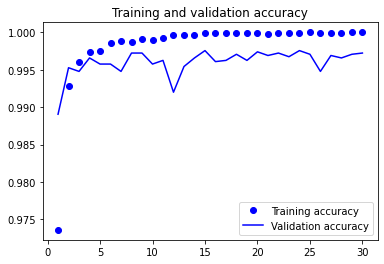

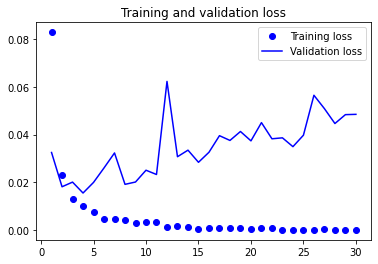

In [10]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [11]:
test_model = keras.models.load_model("convnet_base_model.keras") 
test_loss, test_acc = test_model.evaluate(test_set_1_images,test_set_1_labels)
train_loss, train_acc = test_model.evaluate(train_set_1_images,train_set_1_labels)
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

 40/161 [======>.......................] - ETA: 0s - loss: 0.0014 - accuracy: 0.9992 

2022-03-26 16:49:22.292475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


957/957 [==============================] - 4s 4ms/step - loss: 0.0067 - accuracy: 0.9981
Train accuracy: 0.998
Test accuracy: 0.998


## Naive approach
Here we fit with training set 2 using 20% validation to determine the optimal number of epochs.

In [12]:
inputs = keras.Input(shape=(28, 28, 1)) ## Different from densenet input
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_naive_model.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(
    train_set_2_images,train_set_2_labels,epochs=30, validation_split=0.2, callbacks=callbacks)

Epoch 1/30
1/2 [==============>...............] - ETA: 0s - loss: 2.3071 - accuracy: 0.1250

2022-03-26 16:49:26.902694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 142ms/step - loss: 2.2297 - accuracy: 0.1250 - val_loss: 2.1283 - val_accuracy: 0.1000
Epoch 2/30
2/2 [==============================] - 0s 38ms/step - loss: 1.7305 - accuracy: 0.2500 - val_loss: 2.0823 - val_accuracy: 0.2000
Epoch 3/30
2/2 [==============================] - 0s 34ms/step - loss: 1.5283 - accuracy: 0.4750 - val_loss: 1.5759 - val_accuracy: 0.3000
Epoch 4/30
2/2 [==============================] - 0s 32ms/step - loss: 1.1616 - accuracy: 0.5500 - val_loss: 1.0353 - val_accuracy: 0.6000


2022-03-26 16:49:27.131015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/30
2/2 [==============================] - 0s 19ms/step - loss: 1.0511 - accuracy: 0.5250 - val_loss: 1.4011 - val_accuracy: 0.4000
Epoch 6/30
2/2 [==============================] - 0s 20ms/step - loss: 1.1307 - accuracy: 0.6000 - val_loss: 1.0705 - val_accuracy: 0.8000
Epoch 7/30
2/2 [==============================] - 0s 33ms/step - loss: 0.7268 - accuracy: 0.8000 - val_loss: 0.7561 - val_accuracy: 0.7000
Epoch 8/30
2/2 [==============================] - 0s 33ms/step - loss: 0.5920 - accuracy: 0.8250 - val_loss: 0.6349 - val_accuracy: 0.7000
Epoch 9/30
2/2 [==============================] - 0s 19ms/step - loss: 0.6887 - accuracy: 0.6500 - val_loss: 0.8099 - val_accuracy: 0.7000
Epoch 10/30
2/2 [==============================] - 0s 33ms/step - loss: 0.4265 - accuracy: 0.8500 - val_loss: 0.5925 - val_accuracy: 0.8000
Epoch 11/30
2/2 [==============================] - 0s 19ms/step - loss: 0.3022 - accuracy: 1.0000 - val_loss: 0.7991 - val_accuracy: 0.7000
Epoch 12/30
2/2 [========

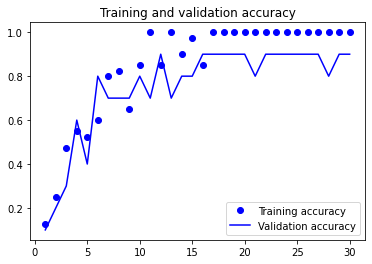

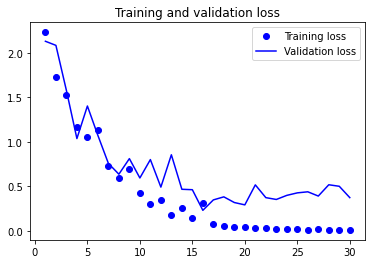

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_model = keras.models.load_model("convnet_naive_model.keras") 
test_loss, test_acc = test_model.evaluate(test_set_2_images,test_set_2_labels)
train_loss, train_acc = test_model.evaluate(train_set_2_images,train_set_2_labels)
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

 28/152 [====>.........................] - ETA: 0s - loss: 0.7738 - accuracy: 0.7344

2022-03-26 16:49:28.358844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step - loss: 0.1082 - accuracy: 0.9800
Train accuracy: 0.980
Test accuracy: 0.728


## Data Augmentation

Use data augmentation as in class using Random Flip, Random Rotation, and Random Zoom


Note: A hack is required to work on my local machine.


In [17]:
data_augmentation_from_class = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
    ])


with tf.device('/cpu:0'): # Required to hack the cpu 
    digit = data_augmentation_from_class(train_set_2_images[:2]) # Required to hack the cpu 
#digit.shape

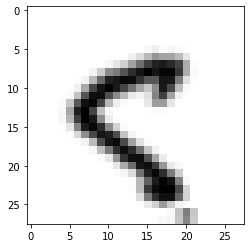

In [18]:

plt.imshow(digit[0], cmap=plt.cm.binary) 
plt.show()

In [19]:
inputs = keras.Input(shape=(28, 28, 1)) 
x = data_augmentation_from_class(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [20]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
callbacks_naive_model_augmentation_1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_naive_model_augmentation_1.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_set_2_images,train_set_2_labels,
                    epochs=30, validation_split=0.2, callbacks=callbacks_naive_model_augmentation_1)

Epoch 1/30


2022-03-26 16:49:29.488428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 146ms/step - loss: 2.2545 - accuracy: 0.1750 - val_loss: 1.8508 - val_accuracy: 0.1000
Epoch 2/30
2/2 [==============================] - 0s 46ms/step - loss: 1.8130 - accuracy: 0.2250 - val_loss: 1.8036 - val_accuracy: 0.2000
Epoch 3/30
2/2 [==============================] - 0s 29ms/step - loss: 1.6760 - accuracy: 0.3000 - val_loss: 1.8198 - val_accuracy: 0.3000
Epoch 4/30
1/2 [==============>...............] - ETA: 0s - loss: 1.5776 - accuracy: 0.3125

2022-03-26 16:49:29.829394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 33ms/step - loss: 1.5819 - accuracy: 0.3250 - val_loss: 1.9203 - val_accuracy: 0.2000
Epoch 5/30
2/2 [==============================] - 0s 43ms/step - loss: 1.6187 - accuracy: 0.2500 - val_loss: 1.7056 - val_accuracy: 0.3000
Epoch 6/30
2/2 [==============================] - 0s 41ms/step - loss: 1.4652 - accuracy: 0.3500 - val_loss: 1.2900 - val_accuracy: 0.6000
Epoch 7/30
2/2 [==============================] - 0s 26ms/step - loss: 1.3850 - accuracy: 0.5250 - val_loss: 1.5349 - val_accuracy: 0.3000
Epoch 8/30
2/2 [==============================] - 0s 25ms/step - loss: 1.3885 - accuracy: 0.4000 - val_loss: 1.3353 - val_accuracy: 0.4000
Epoch 9/30
2/2 [==============================] - 0s 26ms/step - loss: 1.3495 - accuracy: 0.4500 - val_loss: 1.5349 - val_accuracy: 0.3000
Epoch 10/30
2/2 [==============================] - 0s 27ms/step - loss: 1.2876 - accuracy: 0.5250 - val_loss: 1.5085 - val_accuracy: 0.4000
Epoch 11/30
2/2 [====================

In [22]:
## Evaluate
model = keras.models.load_model("convnet_naive_model_augmentation_1.keras") 
test_loss, test_acc = model.evaluate(test_set_2_images,test_set_2_labels) 
train_loss, train_acc = model.evaluate(train_set_2_images,train_set_2_labels) 

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")



 27/152 [====>.........................] - ETA: 0s - loss: 0.9880 - accuracy: 0.5984

2022-03-26 16:49:31.392521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step - loss: 0.4619 - accuracy: 0.8000
Train accuracy: 0.800
Test accuracy: 0.580


**Data augmentation with out flips**

In [51]:
data_augmentation = keras.Sequential([
    layers.GaussianNoise(1),
    layers.RandomZoom(0.2)
    ])


with tf.device('/cpu:0'): # Required to hack the cpu 
    digit = data_augmentation(train_set_2_images[:2]) # Required to hack the cpu 
#digit.shape

In [52]:
inputs = keras.Input(shape=(28, 28, 1)) 
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_7 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                      

In [53]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [54]:
callbacks_naive_model_augmentation_2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_naive_model_augmentation_2.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_set_2_images,train_set_2_labels,
                    epochs=30, validation_split=0.2, callbacks=callbacks_naive_model_augmentation_2)

Epoch 1/30


2022-03-26 17:23:32.822116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 156ms/step - loss: 2.1828 - accuracy: 0.2250 - val_loss: 2.0264 - val_accuracy: 0.1000
Epoch 2/30
2/2 [==============================] - 0s 61ms/step - loss: 2.1219 - accuracy: 0.2000 - val_loss: 1.8771 - val_accuracy: 0.2000
Epoch 3/30
1/2 [==============>...............] - ETA: 0s - loss: 1.6833 - accuracy: 0.2188

2022-03-26 17:23:33.197258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 44ms/step - loss: 1.6956 - accuracy: 0.2000 - val_loss: 1.8685 - val_accuracy: 0.1000
Epoch 4/30
2/2 [==============================] - 0s 78ms/step - loss: 1.6939 - accuracy: 0.2000 - val_loss: 1.7682 - val_accuracy: 0.1000
Epoch 5/30
2/2 [==============================] - 0s 46ms/step - loss: 1.5455 - accuracy: 0.3250 - val_loss: 1.6766 - val_accuracy: 0.2000
Epoch 6/30
2/2 [==============================] - 0s 26ms/step - loss: 1.5559 - accuracy: 0.4000 - val_loss: 1.7055 - val_accuracy: 0.2000
Epoch 7/30
2/2 [==============================] - 0s 59ms/step - loss: 1.4766 - accuracy: 0.4250 - val_loss: 1.6614 - val_accuracy: 0.3000
Epoch 8/30
2/2 [==============================] - 0s 45ms/step - loss: 1.3863 - accuracy: 0.5750 - val_loss: 1.5342 - val_accuracy: 0.4000
Epoch 9/30
2/2 [==============================] - 0s 36ms/step - loss: 1.4466 - accuracy: 0.3000 - val_loss: 1.4913 - val_accuracy: 0.2000
Epoch 10/30
2/2 [=====================

In [55]:
## Evaluate
model = keras.models.load_model("convnet_naive_model_augmentation_2.keras") 
test_loss, test_acc = model.evaluate(test_set_2_images,test_set_2_labels) 
train_loss, train_acc = model.evaluate(train_set_2_images,train_set_2_labels) 

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")


 25/152 [===>..........................] - ETA: 0s - loss: 0.9136 - accuracy: 0.7175

2022-03-26 17:23:34.807032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step - loss: 0.5712 - accuracy: 0.9200
Train accuracy: 0.920
Test accuracy: 0.720


## Pretrain without fine tuning

In [61]:
model = keras.models.load_model("convnet_base_model.keras") 
conv_base = keras.Sequential(model.layers[:7])
conv_base.trainable = False

In [62]:
inputs = keras.Input(shape=(28, 28, 1)) 
x = data_augmentation(inputs)
x = conv_base(x)
outputs = layers.Dense(10, activation="softmax")(x)

conv_model_fine_tuning_0 = keras.Model(inputs=inputs, outputs=outputs)
conv_model_fine_tuning_0.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_7 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 sequential_9 (Sequential)   (None, 1152)              92672     
                                                                 
 dense_11 (Dense)            (None, 10)                11530     
                                                                 
Total params: 104,202
Trainable params: 11,530
Non-trainable params: 92,672
_________________________________________________________________


In [63]:
conv_model_fine_tuning_0.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [64]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="conv_model_fine_tuning_0.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_set_2_images,train_set_2_labels,
                    epochs=30, validation_split=0.2, callbacks=callbacks)

Epoch 1/30


2022-03-26 17:27:37.412371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 190ms/step - loss: 17.4135 - accuracy: 0.0000e+00 - val_loss: 6.0751 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 56ms/step - loss: 5.7086 - accuracy: 0.0000e+00 - val_loss: 2.3268 - val_accuracy: 0.0000e+00
Epoch 3/30
1/2 [==============>...............] - ETA: 0s - loss: 2.2522 - accuracy: 0.1875

2022-03-26 17:27:37.839841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 45ms/step - loss: 2.1545 - accuracy: 0.2250 - val_loss: 1.4064 - val_accuracy: 0.6000
Epoch 4/30
2/2 [==============================] - 0s 39ms/step - loss: 1.2923 - accuracy: 0.7000 - val_loss: 1.1946 - val_accuracy: 0.7000
Epoch 5/30
2/2 [==============================] - 0s 37ms/step - loss: 1.0176 - accuracy: 0.8000 - val_loss: 0.9916 - val_accuracy: 0.8000
Epoch 6/30
2/2 [==============================] - 0s 36ms/step - loss: 0.8350 - accuracy: 0.8250 - val_loss: 0.9758 - val_accuracy: 0.7000
Epoch 7/30
2/2 [==============================] - 0s 65ms/step - loss: 0.6814 - accuracy: 0.9000 - val_loss: 0.8487 - val_accuracy: 0.8000
Epoch 8/30
2/2 [==============================] - 0s 38ms/step - loss: 0.5408 - accuracy: 0.9750 - val_loss: 0.6941 - val_accuracy: 0.9000
Epoch 9/30
2/2 [==============================] - 0s 36ms/step - loss: 0.4420 - accuracy: 0.9750 - val_loss: 0.5632 - val_accuracy: 0.9000
Epoch 10/30
2/2 [=====================

In [65]:
## Evaluate
model = keras.models.load_model("conv_model_fine_tuning_0.keras") 
test_loss, test_acc = model.evaluate(test_set_2_images,test_set_2_labels) 
train_loss, train_acc = model.evaluate(train_set_2_images,train_set_2_labels) 

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

 26/152 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8534

2022-03-26 17:27:39.235082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 35ms/step - loss: 0.0694 - accuracy: 0.9800
Train accuracy: 0.980
Test accuracy: 0.852


## Pretrain with fine tuning

**Fine tuning 1 convolutional  layer (k=1)**

In [66]:
model = keras.models.load_model("convnet_base_model.keras") 
conv_base = keras.Sequential(model.layers[:5])
conv_base.trainable = False

In [67]:
inputs = keras.Input(shape=(28, 28, 1)) 
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

conv_model_fine_tuning_1 = keras.Model(inputs=inputs, outputs=outputs)
conv_model_fine_tuning_1.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_7 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 sequential_10 (Sequential)  (None, 5, 5, 64)          18816     
                                                                 
 conv2d_24 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_9 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                11530     
                                                                 
Total params: 104,202
Trainable params: 85,386
Non-trainab

In [68]:
conv_model_fine_tuning_1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [69]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="conv_model_fine_tuning_1.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_set_2_images,train_set_2_labels,
                    epochs=30, validation_split=0.2, callbacks=callbacks)

Epoch 1/30


2022-03-26 17:30:30.570897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 180ms/step - loss: 17.2839 - accuracy: 0.0000e+00 - val_loss: 5.8914 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 41ms/step - loss: 5.4661 - accuracy: 0.0000e+00 - val_loss: 2.1190 - val_accuracy: 0.1000
Epoch 3/30
1/2 [==============>...............] - ETA: 0s - loss: 2.1856 - accuracy: 0.2188

2022-03-26 17:30:31.010762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 64ms/step - loss: 2.0674 - accuracy: 0.2750 - val_loss: 1.3100 - val_accuracy: 0.7000
Epoch 4/30
2/2 [==============================] - 0s 41ms/step - loss: 1.2837 - accuracy: 0.7000 - val_loss: 1.0960 - val_accuracy: 0.8000
Epoch 5/30
2/2 [==============================] - 0s 68ms/step - loss: 0.9670 - accuracy: 0.7750 - val_loss: 1.0750 - val_accuracy: 0.7000
Epoch 6/30
2/2 [==============================] - 0s 36ms/step - loss: 0.7991 - accuracy: 0.8250 - val_loss: 0.8526 - val_accuracy: 0.9000
Epoch 7/30
2/2 [==============================] - 0s 40ms/step - loss: 0.6535 - accuracy: 0.9250 - val_loss: 0.7609 - val_accuracy: 0.9000
Epoch 8/30
2/2 [==============================] - 0s 43ms/step - loss: 0.5383 - accuracy: 0.9500 - val_loss: 0.6999 - val_accuracy: 0.8000
Epoch 9/30
2/2 [==============================] - 0s 34ms/step - loss: 0.4413 - accuracy: 0.9750 - val_loss: 0.6921 - val_accuracy: 0.8000
Epoch 10/30
2/2 [=====================

In [70]:
## Evaluate
model = keras.models.load_model("conv_model_fine_tuning_1.keras") 
test_loss, test_acc = model.evaluate(test_set_2_images,test_set_2_labels) 
train_loss, train_acc = model.evaluate(train_set_2_images,train_set_2_labels) 

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

 23/152 [===>..........................] - ETA: 0s - loss: 0.4271 - accuracy: 0.8723

2022-03-26 17:30:32.487201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 38ms/step - loss: 0.0512 - accuracy: 0.9800
Train accuracy: 0.980
Test accuracy: 0.866


**Fine tuning 2 convolutional  layers (k=2)**

In [71]:
model = keras.models.load_model("convnet_base_model.keras") 
conv_base = keras.Sequential(model.layers[:3])
conv_base.trainable = False

In [72]:
inputs = keras.Input(shape=(28, 28, 1)) 
x = data_augmentation(inputs)
x = conv_base(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

conv_model_fine_tuning_2 = keras.Model(inputs=inputs, outputs=outputs)
conv_model_fine_tuning_2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_7 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 sequential_11 (Sequential)  (None, 13, 13, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 128)         73856     
                                                          

In [73]:
conv_model_fine_tuning_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [74]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="conv_model_fine_tuning_2.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_set_2_images,train_set_2_labels,
                    epochs=30, validation_split=0.2, callbacks=callbacks)

Epoch 1/30


2022-03-26 17:32:07.194809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 180ms/step - loss: 17.2474 - accuracy: 0.0000e+00 - val_loss: 5.5876 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 40ms/step - loss: 5.0778 - accuracy: 0.0250 - val_loss: 1.9466 - val_accuracy: 0.1000
Epoch 3/30
1/2 [==============>...............] - ETA: 0s - loss: 2.0317 - accuracy: 0.2500

2022-03-26 17:32:07.614145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 55ms/step - loss: 1.9369 - accuracy: 0.3000 - val_loss: 1.3928 - val_accuracy: 0.5000
Epoch 4/30
2/2 [==============================] - 0s 44ms/step - loss: 1.2284 - accuracy: 0.5750 - val_loss: 1.1222 - val_accuracy: 0.7000
Epoch 5/30
2/2 [==============================] - 0s 55ms/step - loss: 0.9373 - accuracy: 0.8250 - val_loss: 0.9634 - val_accuracy: 0.8000
Epoch 6/30
2/2 [==============================] - 0s 46ms/step - loss: 0.7715 - accuracy: 0.8250 - val_loss: 0.8322 - val_accuracy: 0.9000
Epoch 7/30
2/2 [==============================] - 0s 54ms/step - loss: 0.6150 - accuracy: 0.9750 - val_loss: 0.8387 - val_accuracy: 0.8000
Epoch 8/30
2/2 [==============================] - 0s 42ms/step - loss: 0.5072 - accuracy: 0.9500 - val_loss: 0.6289 - val_accuracy: 0.9000
Epoch 9/30
2/2 [==============================] - 0s 41ms/step - loss: 0.4085 - accuracy: 0.9750 - val_loss: 0.5983 - val_accuracy: 0.9000
Epoch 10/30
2/2 [=====================

In [75]:
## Evaluate
model = keras.models.load_model("conv_model_fine_tuning_2.keras") 
test_loss, test_acc = model.evaluate(test_set_2_images,test_set_2_labels) 
train_loss, train_acc = model.evaluate(train_set_2_images,train_set_2_labels) 

print(f"Train accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

 16/152 [==>...........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8496

2022-03-26 17:32:09.870999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 29ms/step - loss: 0.0569 - accuracy: 0.9800
Train accuracy: 0.980
Test accuracy: 0.854
